In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import npc_lims
from npc_sessions import DynamicRoutingSession
from dynamic_routing_analysis import spike_utils


In [26]:
session_probe_configs={
    '666986_2023-08-14':'medial DEF posterior',
    '666986_2023-08-15':'medial DEF posterior',
    '666986_2023-08-16':'standard 1',
    '666986_2023-08-17':'standard 1',

    '662892_2023-08-21':'standard 2',
    '662892_2023-08-22':'standard 2',
    '662892_2023-08-23':'posterior 1',
    '662892_2023-08-24':'posterior 1',

    '668755_2023-08-28':'striatum',
    '668755_2023-08-29':'striatum',
    '668755_2023-08-30':'rotation CCW',
    '668755_2023-08-31':'rotation CCW',

    '667252_2023-09-25':'standard 1',
    '667252_2023-09-26':'standard 1',
    '667252_2023-09-27':'frontal + vis',
    '667252_2023-09-28':'frontal + vis',

    '674562_2023-10-02':'rotation CW',
    '674562_2023-10-03':'rotation CW',
    '674562_2023-10-04':'medial DEF anterior',
    '674562_2023-10-05':'medial DEF anterior',
}

In [142]:
DR_ephys_sessions = tuple(s for s in npc_lims.get_session_info(is_ephys=True) 
                          if s.is_uploaded and s.is_annotated)

session_unit_areas={}
except_list={}

for DR_session in DR_ephys_sessions[:]:

    if DR_session.id in list(session_probe_configs.keys()):
        session = DynamicRoutingSession(DR_session.id)
        try:
            session_unit_areas[str(session.id)]=session.units[:].query('default_qc')['structure'].value_counts()
        except Exception as e:
            except_list[str(session.id)]=e


Session 667252_2023-09-27 has known issues: ['https://github.com/AllenInstitute/npc_sessions/issues/55']
probe_insertions.json and annotation info do not match for 662892_2023-08-24 - using annotation info


In [144]:
session_unit_areas['674562_2023-10-05']

MOs     679
ACAd    382
ACAv    328
MOp     156
RSPd     92
ILA      76
CA1      73
DP       57
LH       42
MH       15
cing     14
st       11
hbc      10
fr       10
fa        7
root      6
ccg       2
VL        2
RT        1
fp        1
dhc       1
fi        1
SEZ       1
LSr       1
Name: structure, dtype: int64

In [145]:
import pickle
import os 

savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\unit_yield_by_config_10-26-23"
with open(os.path.join(savepath,'session_unit_areas.pkl'), 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(session_unit_areas, file) 

In [155]:
with open(os.path.join(savepath,'session_unit_areas.pkl'), 'rb') as file: 
    session_unit_areas=pickle.load(file) 

In [156]:
session_unit_areas

{'674562_2023-10-05': MOs     679
 ACAd    382
 ACAv    328
 MOp     156
 RSPd     92
 ILA      76
 CA1      73
 DP       57
 LH       42
 MH       15
 cing     14
 st       11
 hbc      10
 fr       10
 fa        7
 root      6
 ccg       2
 VL        2
 RT        1
 fp        1
 dhc       1
 fi        1
 SEZ       1
 LSr       1
 Name: structure, dtype: int64,
 '674562_2023-10-04': MOs       738
 ACAd      224
 MOp       189
 CA1       172
 VISp      161
 APN       117
 ACAv       97
 RSPagl     89
 CA3        33
 LGv        31
 ccg        26
 DG         23
 MRN         8
 or          1
 Name: structure, dtype: int64,
 '674562_2023-10-03': CP       303
 MOs      264
 SSp      186
 ACAv     161
 RSPv     127
 VISal    117
 MD        73
 ACAd      64
 MOp       56
 RSPd      53
 SSs       48
 PAG       34
 SF        23
 SCiw      19
 MRN       18
 AUDd      15
 TRS       12
 SCdg      11
 SCig      10
 MB         6
 SCop       4
 SCdw       3
 VISrl      3
 cing       2
 CA3        2
 

In [147]:
#plot distribution of unit yield by config!

config_list=[]
for id in session_probe_configs.keys():
    config_list.append(session_probe_configs[id])

unique_configs=np.unique(config_list)

In [148]:
unique_configs

array(['frontal + vis', 'medial DEF anterior', 'medial DEF posterior',
       'posterior 1', 'rotation CCW', 'rotation CW', 'standard 1',
       'standard 2', 'striatum'], dtype='<U20')

In [149]:
config_session_ids={}
for config in unique_configs:
    config_session_ids[config]=[]
    for id in session_probe_configs.keys():
        if session_probe_configs[id]==config:
            config_session_ids[config].append(id)
    

In [150]:
config_session_ids

{'frontal + vis': ['667252_2023-09-27', '667252_2023-09-28'],
 'medial DEF anterior': ['674562_2023-10-04', '674562_2023-10-05'],
 'medial DEF posterior': ['666986_2023-08-14', '666986_2023-08-15'],
 'posterior 1': ['662892_2023-08-23', '662892_2023-08-24'],
 'rotation CCW': ['668755_2023-08-30', '668755_2023-08-31'],
 'rotation CW': ['674562_2023-10-02', '674562_2023-10-03'],
 'standard 1': ['666986_2023-08-16',
  '666986_2023-08-17',
  '667252_2023-09-25',
  '667252_2023-09-26'],
 'standard 2': ['662892_2023-08-21', '662892_2023-08-22'],
 'striatum': ['668755_2023-08-28', '668755_2023-08-29']}

In [151]:
config_areas={}
n_recs_per_config={}
for config in config_session_ids:
    temp_config_areas=[]
    for sessionid in config_session_ids[config]:
        if sessionid in session_unit_areas.keys():
            temp_config_areas.append(session_unit_areas[sessionid].fillna(0))
    if len(temp_config_areas)>0:
        config_areas[config]=pd.concat(temp_config_areas,axis=1).mean(axis=1).rename(config)
    n_recs_per_config[config]=len(temp_config_areas)
    
config_areas_df=pd.DataFrame(config_areas)
config_areas_df


,frontal + vis,medial DEF anterior,medial DEF posterior,posterior 1,rotation CCW,rotation CW,standard 1,standard 2,striatum
ACAd,19.0,303.0,149.0,NaN,95.0,52.5,NaN,NaN,NaN
ACAv,NaN,212.5,144.0,NaN,204.5,141.0,NaN,NaN,NaN
AId,14.0,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
AON,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN
APN,11.0,117.0,NaN,NaN,NaN,NaN,35.000000,43.0,NaN
...,...,...,...,...,...,...,...,...,...
int,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN
or,2.0,1.0,NaN,NaN,1.0,1.5,23.333333,9.0,NaN
root,1.0,6.0,5.0,27.5,25.0,1.0,5.000000,6.0,NaN
scwm,2.0,NaN,NaN,43.0,1.0,1.0,3.000000,4.0,1.0


In [152]:
n_recs_per_config

{'frontal + vis': 2,
 'medial DEF anterior': 2,
 'medial DEF posterior': 1,
 'posterior 1': 2,
 'rotation CCW': 2,
 'rotation CW': 2,
 'standard 1': 3,
 'standard 2': 2,
 'striatum': 1}

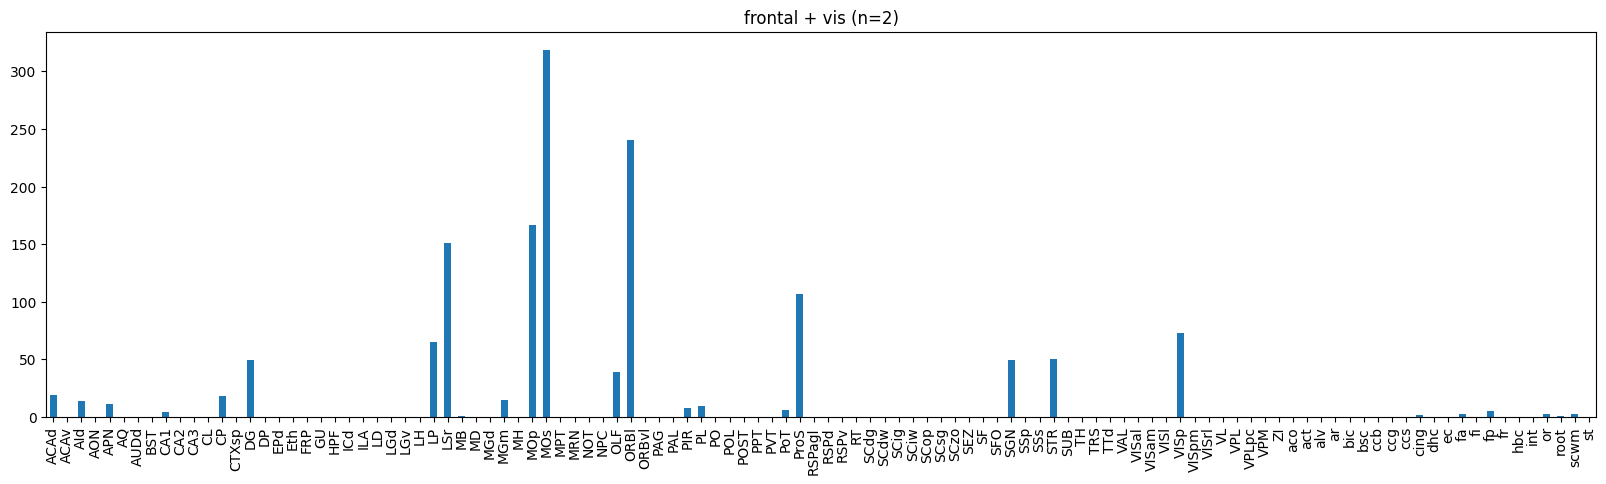

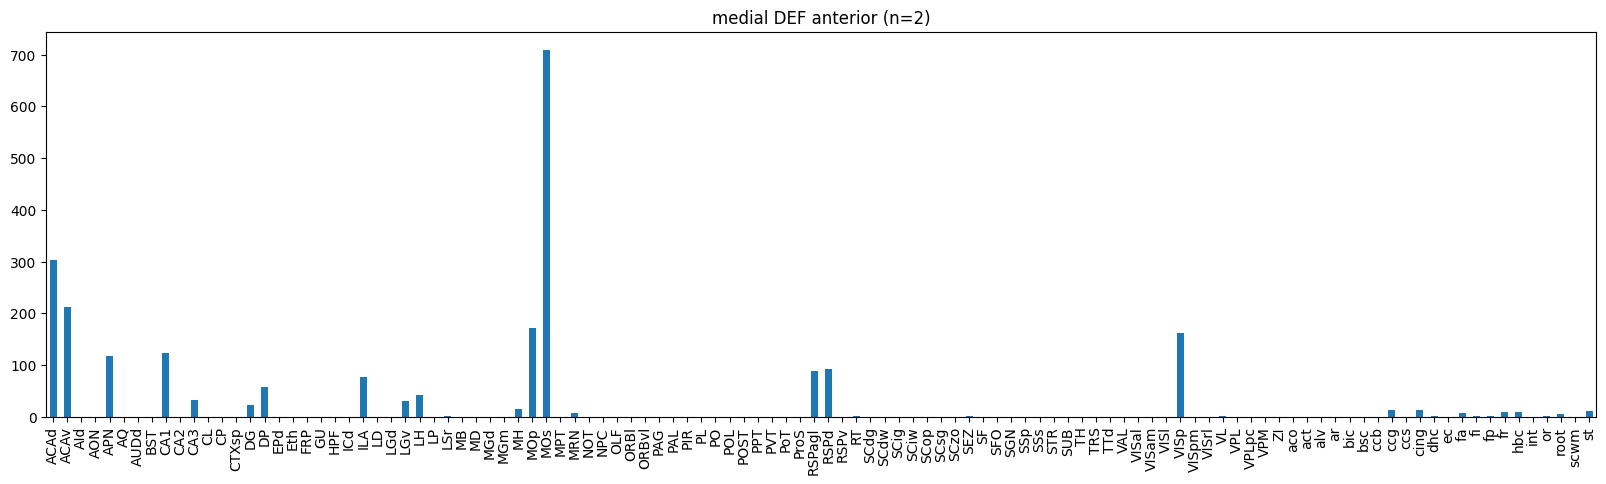

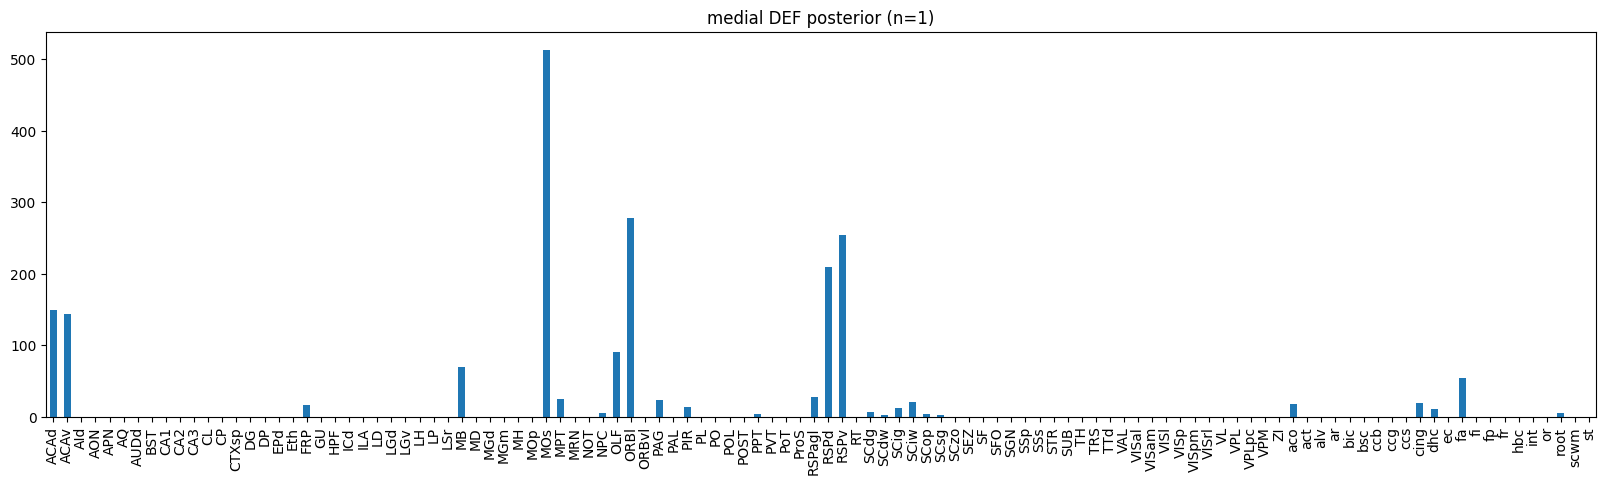

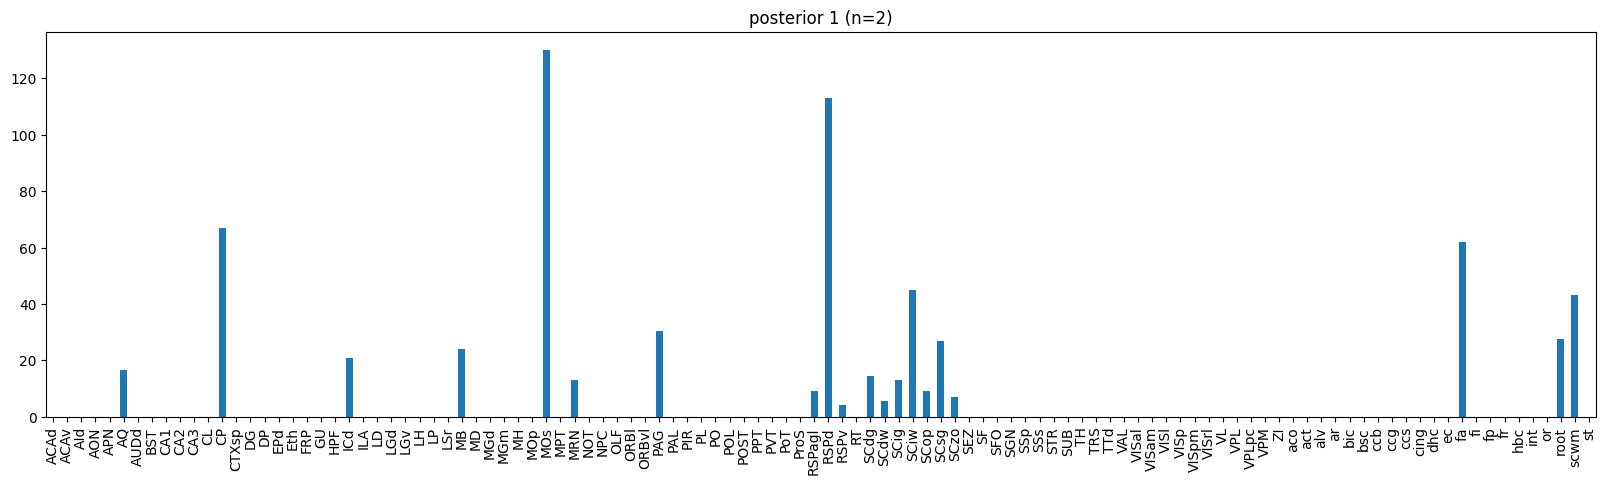

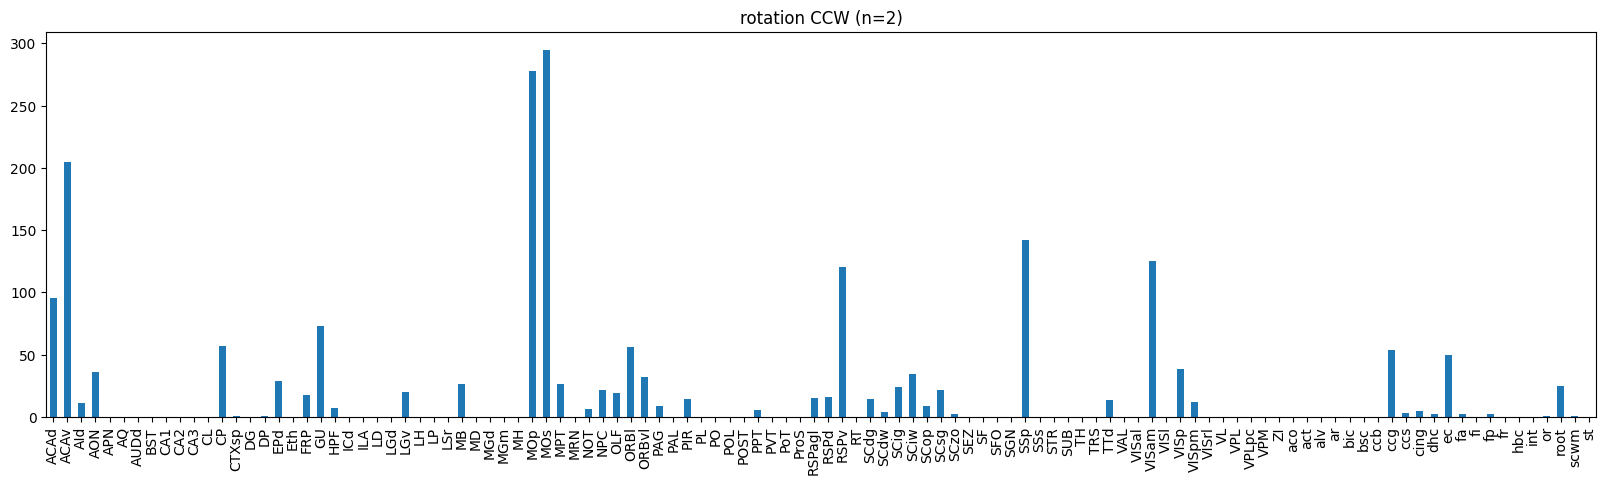

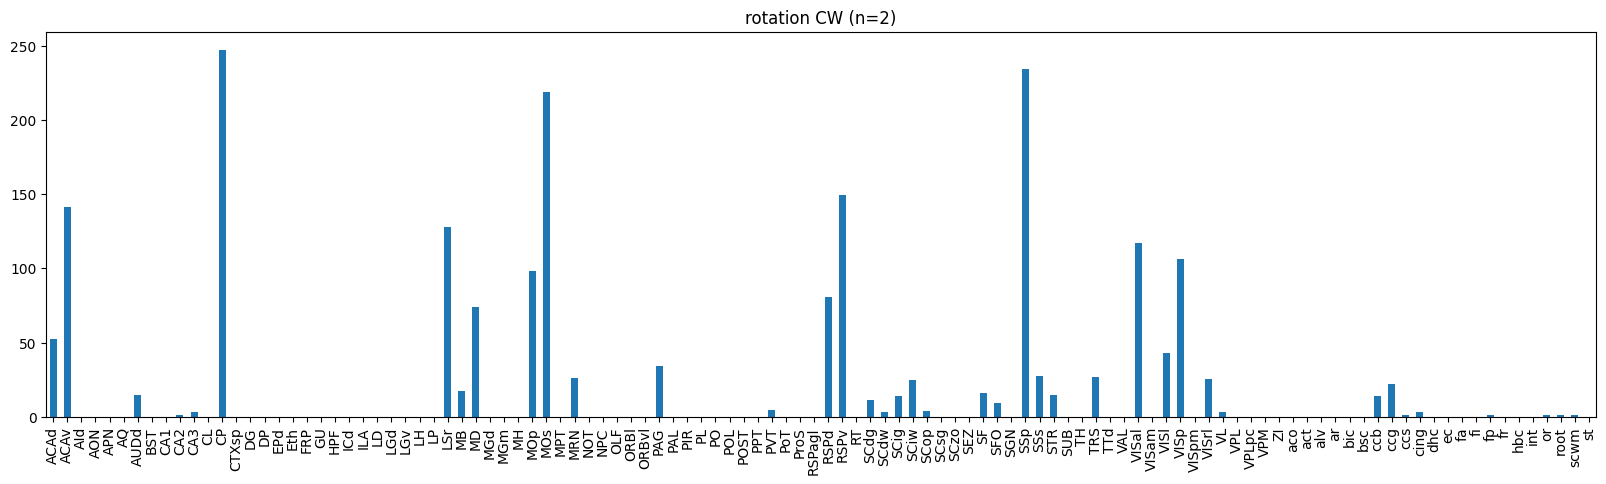

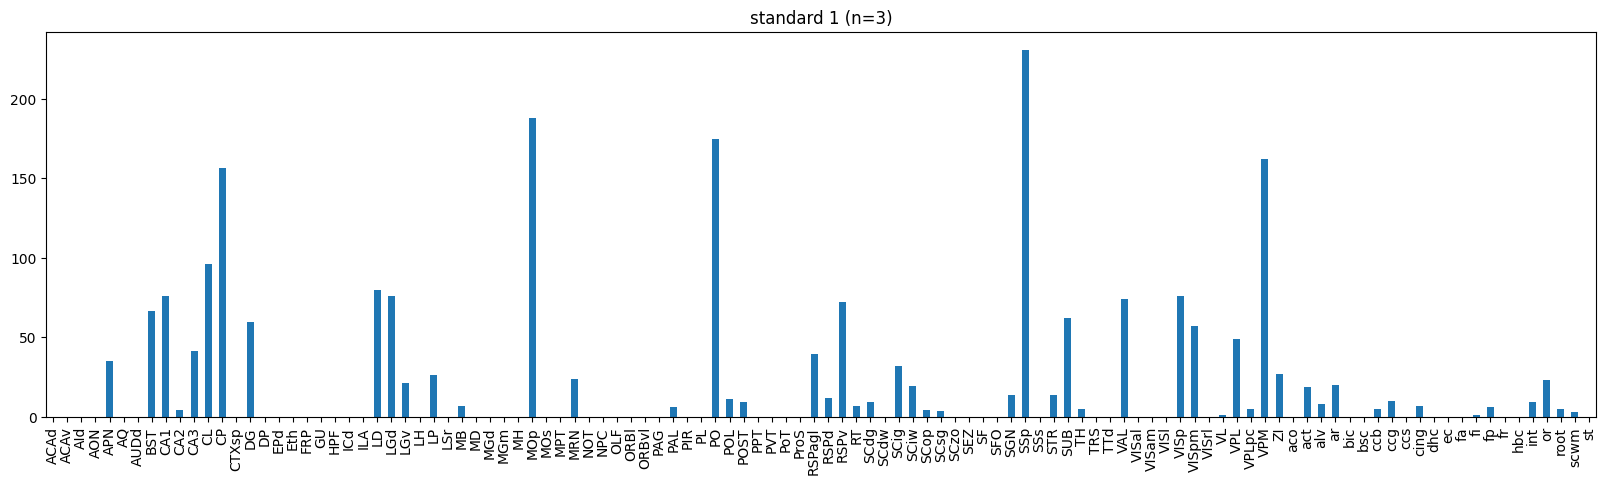

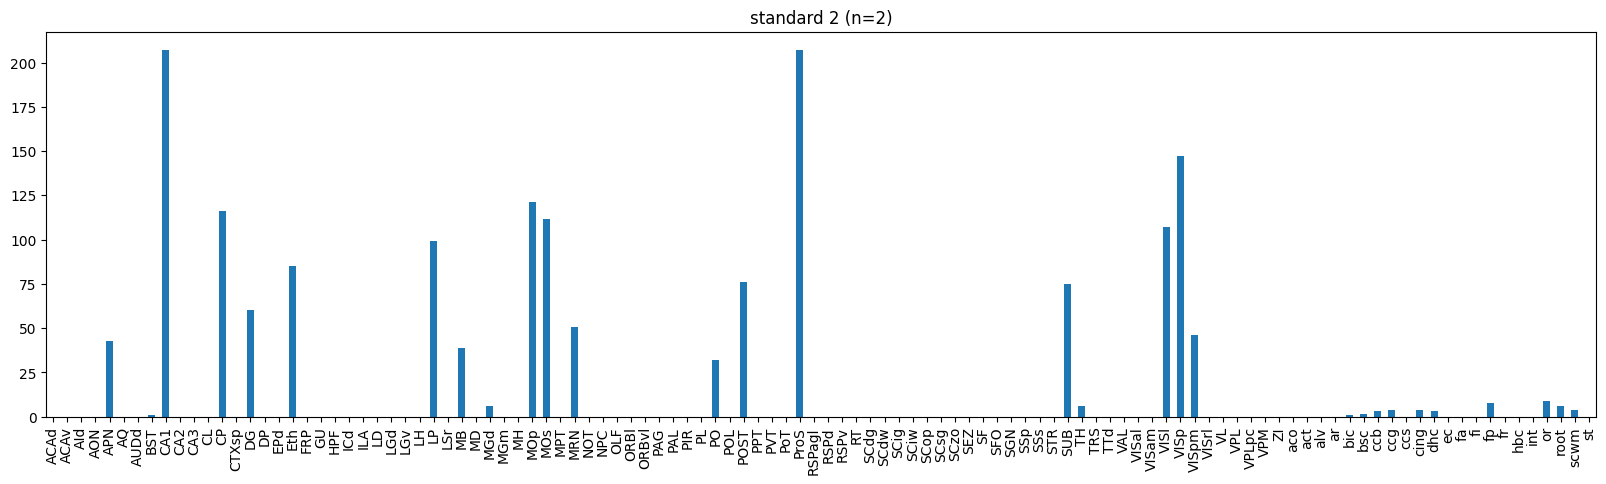

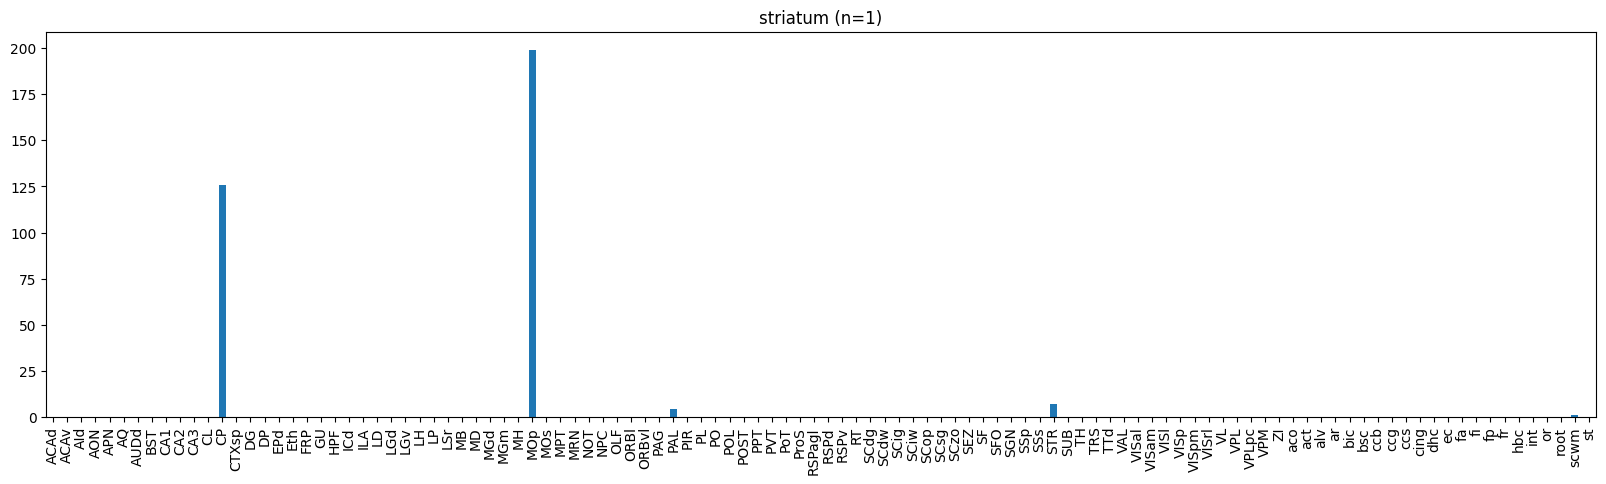

In [153]:
for config in config_areas_df.columns:
    fig,ax=plt.subplots(1,1)
    config_areas_df[config].plot.bar(ax=ax,figsize=(20,5),title=config+' (n='+str(n_recs_per_config[config])+')')
    figpath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\unit_yield_by_config_10-26-23'
    figname=config+'.png'
    # figname='control_heatmap_500ms_all.png'
    fig.savefig(os.path.join(figpath,figname), dpi=300, facecolor='w', edgecolor='w',
                orientation='portrait', format='png',
                transparent=True, bbox_inches='tight', pad_inches=0.1,
                metadata=None)
    